In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("shopping_trends_updated.csv")
colors = ['black', 'green']

df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


```
1. What is the impact of customer subscription status on their purchase behavior and the categories of items they prefer to buy? Are subscribed customers more likely to make larger purchases or have different preferences compared to non-subscribed customers?
```

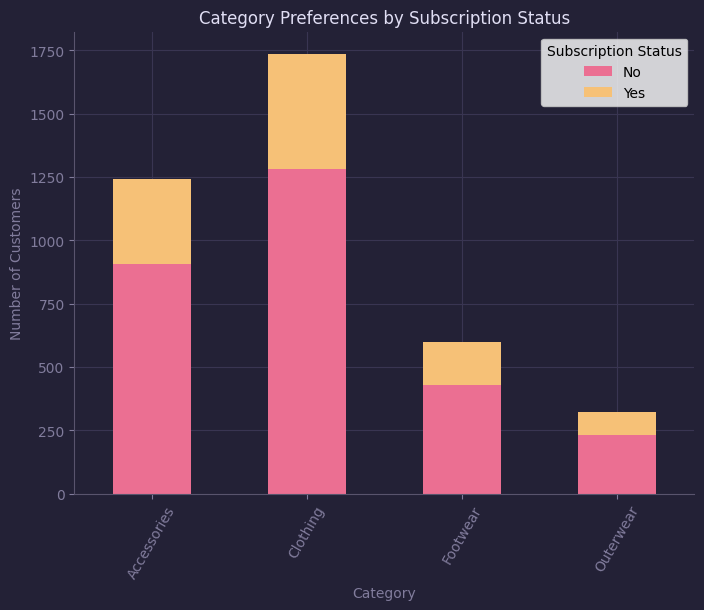

In [2]:
with plt.style.context("rose-pine-moon.mplstyle"):
    category = df.pivot_table(index='Category', columns='Subscription Status', values='Customer ID', aggfunc='count')
    category.plot(kind='bar', stacked=True, figsize=(8, 6), rot=60)

plt.xlabel('Category')
plt.ylabel('Number of Customers')
plt.title('Category Preferences by Subscription Status')
plt.legend(title='Subscription Status')
plt.show()


```The visual analysis of this bar graph reveals a fixed trend between various product categories. For Accessories, Clothing, Footwear, and Outwear, the number of customers with a subscription to this shopping market consistently passes those without a subscription. This indicates a preference among subscribed customers for purchasing items inside these 4 categories, as opposed to non-subscribed customers. The black bars shows some interest from non-subscribed customers as well, however, the overall data / graph implies that customers with a subscription are more active in categories of the shopping market as compared customers without one. ```



```
2. What are the most common payment methods used by customers within specific product categories, to better understand customer preferences and payment processing systems?
```

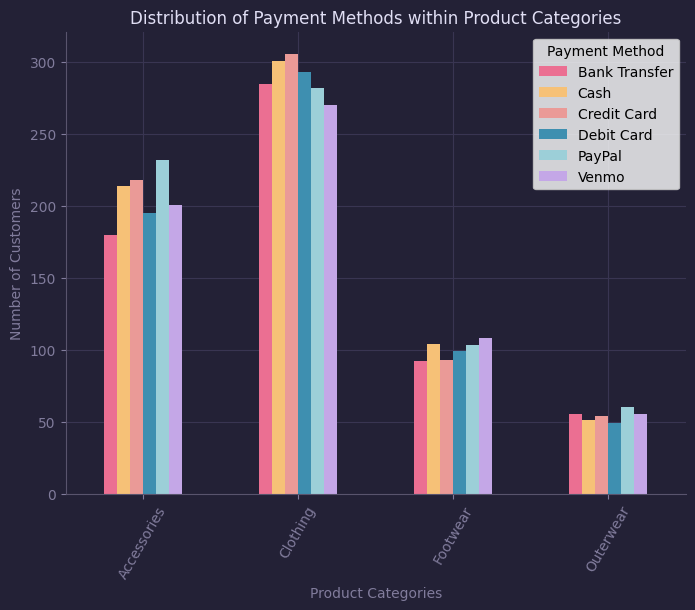

In [3]:
with plt.style.context("rose-pine-moon.mplstyle"):
    catpayments = df.groupby(['Category', 'Payment Method']).size().unstack()
    catpayments.plot(kind='bar', figsize=(8, 6), rot=60)

plt.xlabel('Product Categories')
plt.ylabel('Number of Customers')
plt.title('Distribution of Payment Methods within Product Categories')
plt.legend(title='Payment Method')
plt.show()



```
The visual analysis of the "Distribution of Payment Methods within Product Categories" bar graph reveals distinct patterns in customer payment preferences across different product categories. For Accessories and Footwear, Bank Transfer emerges as the most popular payment method, highlighting a preference for more traditional banking transactions. In contrast, Outerwear sees Credit Card as the predominant choice, indicating a potential inclination towards credit-based transactions within this category. The variation in rankings among Cash, Credit Card, and Venmo across categories suggests nuanced differences in customer behaviors. This information is valuable for businesses seeking to optimize their payment processing systems, as it underscores the importance of tailoring payment options to specific product categories in order to meet customer expectations and enhance overall satisfaction.
```